# TO DO LIST

- Radar Plots

- Pie Charts

- Colour Map (green if possible)


# The Main 

In [532]:
import pandas as pd
import numpy as np
# Custom Modules
import sys
sys.path.append('../Functions')  # Adjust the path to your custom module directory
import CleanUp as p  # Importing custom CleanUp module

from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import RobustScaler

In [533]:
filepath = '../Data/DM2425_ABCDEats_DATASET.csv'
# Load the raw data
raw_data = pd.read_csv(filepath)
df, columns_dict = p.cleanUp(raw_data)

-----------looking for incostisencies -----------
There are repeated values in the dataset
      customer_id customer_region  customer_age  vendor_count  product_count  \
20855  742ca068fc            8550          20.0             1              2   
20907  742ca068fc            8550          20.0             1              2   

       is_chain  first_order  last_order last_promo payment_method  ...  \
20855         0         35.0          35          -           CARD  ...   
20907         0         35.0          35          -           CARD  ...   

       HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
20855      0      0      0      0      0      0      0      0      0      0  
20907      0      0      0      0      0      0      0      0      0      0  

[2 rows x 56 columns]
There are inconsistencies between DOW and HR columns
1553.0
filling HR_0
-----------identify the numerical columns -----------
primary_key is not numerical
-----------Identify the non n

In [534]:
key = columns_dict.keys()
print(key)
new_features_list = columns_dict['new_features_list']
numerical_columns = columns_dict['numerical_columns']
CUI_col = columns_dict['CUI_col']
HR_col = columns_dict['HR_col']
DOW_col = columns_dict['DOW_col']

dict_keys(['non_numerical_columns', 'new_features_list', 'numerical_columns', 'CUI_col', 'HR_col', 'DOW_col'])


In [535]:
# Removing people above 53 years old and below 15 years old
df = df[(df['customer_age'] <= 52)]

In [536]:
key = columns_dict.keys()
print(key)
new_features_list = columns_dict['new_features_list']
numerical_columns = columns_dict['numerical_columns']
CUI_col = columns_dict['CUI_col']
HR_col = columns_dict['HR_col']
DOW_col = columns_dict['DOW_col']

dict_keys(['non_numerical_columns', 'new_features_list', 'numerical_columns', 'CUI_col', 'HR_col', 'DOW_col'])


In [537]:
# Removing people above 53 years old and below 15 years old
df = df[(df['customer_age'] <= 52)]

In [538]:
hours_cluster = pd.read_csv("hours_clusters.csv")
hours_cluster

,K_Means_5_clusters
0,2
1,2
2,2
3,2
4,2
...,...
31454,2
31455,2
31456,2
31457,2


In [539]:
dow_clusters = pd.read_csv("c:\\Users\\andre\\OneDrive\\Documentos\\GitHub\\DataMining_G31\\Notebooks\\DOW_K_means_4_clusters.csv")
dow_clusters

,K_Means_4_clusters
0,1
1,1
2,1
3,1
4,1
...,...
31454,1
31455,1
31456,1
31457,1


In [540]:
df.reset_index(drop=True, inplace=True)
df["HOURS_CLUSTER"] = hours_cluster["K_Means_5_clusters"]
df["DOW_CLUSTER"] = dow_clusters["K_Means_4_clusters"]

In [541]:
df

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,avg_product_by_order,delta_day_order,tot_value_cui,order_freq,value_freq,product_freq,avg_order_value,avg_product_value,HOURS_CLUSTER,DOW_CLUSTER
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,2.5,2.0,28.88,1.000000,14.440,2.500000,5.776,5.776,2,1
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,1.0,2.0,19.21,1.000000,9.605,1.000000,9.605,9.605,2,1
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,1.0,2.0,9.20,1.000000,4.600,1.000000,4.600,4.600,2,1
3,180c632ed8,4660,26.0,2,3,1,0.0,2,DELIVERY,DIGI,...,1.5,3.0,31.56,0.666667,10.520,1.000000,10.520,10.520,2,1
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,No_Promo,DIGI,...,2.5,3.0,55.44,0.666667,18.480,1.666667,11.088,11.088,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31454,f4e366c281,8670,30.0,1,1,1,0.0,0,FREEBIE,DIGI,...,1.0,1.0,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1
31455,f6b6709018,8670,26.0,1,1,0,0.0,0,DELIVERY,DIGI,...,1.0,1.0,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1
31456,f74ad8ce3f,8670,24.0,1,1,1,0.0,0,No_Promo,DIGI,...,1.0,1.0,17.79,1.000000,17.790,1.000000,17.790,17.790,2,1
31457,f7b19c0241,8670,34.0,1,1,0,0.0,0,DISCOUNT,DIGI,...,1.0,1.0,12.03,1.000000,12.030,1.000000,12.030,12.030,2,1


In [542]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Merging using Hierarchical clustering

# 1. HOURS AND DOW MERGE

## First Iteration Full Data

In [543]:
# Centroids of the concatenated cluster labels
df_centroids = df.groupby(['HOURS_CLUSTER', 'DOW_CLUSTER'])\
    [DOW_col + HR_col].mean()
df_centroids

DOW_0     DOW_1     DOW_2     DOW_3     DOW_4  \
HOURS_CLUSTER DOW_CLUSTER                                                     
0             0            0.054931  0.055160  0.056286  0.058009  0.084343   
              1            0.033542  0.027481  0.037323  0.030888  0.042712   
              2            0.105985  0.108552  0.117207  0.098724  0.106764   
              3            0.248864  0.212299  0.249091  0.218182  0.227273   
1             0            0.045641  0.043012  0.054010  0.053903  0.070254   
              1            0.032090  0.032116  0.038944  0.041434  0.064887   
              2            0.091560  0.089940  0.106379  0.101356  0.104111   
              3            0.191406  0.178676  0.217500  0.190441  0.227344   
2             0            0.029571  0.023879  0.030646  0.028678  0.037788   
              1            0.017034  0.016138  0.019409  0.018163  0.023762   
              2            0.071973  0.072222  0.087045  0.078946  0.071444   
3             0            0.054688  0.043693  0.052724  0.049774  0.057091   
              1            0.035212  0.033000  0.042105  0.035041  0.034988   
              2            0.091751  0.093023  0.102422  0.090287  0.085302   
              3            0.210145  0.219949  0.224155  0.213129  0.231884   
4             0            0.094595  0.082141  0.094895  0.101219  0.123874   
              2            0.146404  0.152834  0.181431  0.150416  0.149829   
              3            0.257483  0.251989  0.287805  0.260076  0.265937   

                              DOW_5     DOW_6      HR_0      HR_1      HR_2  \
HOURS_CLUSTER DOW_CLUSTER                                                     
0             0            0.114706  0.124740  0.019146  0.008403  0.006055   
              1            0.027992  0.030309  0.010039  0.004688  0.002252   
              2            0.052494  0.051870  0.026434  0.013003  0.009144   
              3            0.173182  0.214545  0.041212  0.022727  0.016667   
1             0            0.107425  0.126175  0.000815  0.001007  0.000392   
              1            0.032390  0.035431  0.000000  0.000000  0.000000   
              2            0.040633  0.044912  0.000898  0.000963  0.000618   
              3            0.127500  0.151250  0.000000  0.000000  0.000000   
2             0            0.091555  0.101200  0.003135  0.003565  0.003919   
              1            0.018082  0.019121  0.001753  0.001788  0.002558   
              2            0.020745  0.021041  0.003274  0.003508  0.003175   
3             0            0.108774  0.111538  0.018429  0.031422  0.048277   
              1            0.026914  0.024522  0.004785  0.017430  0.030901   
              2            0.036628  0.033648  0.019283  0.034572  0.050388   
              3            0.150725  0.171739  0.053140  0.093168  0.138889   
4             0            0.178829  0.211712  0.003003  0.000644  0.001502   
              2            0.060502  0.062785  0.000913  0.000652  0.000381   
              3            0.195344  0.211086  0.004878  0.005860  0.005913   

                           ...     HR_14     HR_15     HR_16     HR_17  \
HOURS_CLUSTER DOW_CLUSTER  ...                                           
0             0            ...  0.033804  0.015496  0.017144  0.023702   
              1            ...  0.008316  0.002182  0.004037  0.006757   
              2            ...  0.031268  0.017131  0.015189  0.025187   
              3            ...  0.101399  0.042292  0.051240  0.065000   
1             0            ...  0.048438  0.042579  0.061688  0.081579   
              1            ...  0.024154  0.037329  0.066028  0.058062   
              2            ...  0.046133  0.046935  0.071398  0.082143   
              3            ...  0.077885  0.110870  0.207955  0.258125   
2             0            ...  0.021187  0.010014  0.009859  0.015595   
              1            ...  0.009059  0.006260  0.

Text(0, 0.5, 'Euclidean Distance')

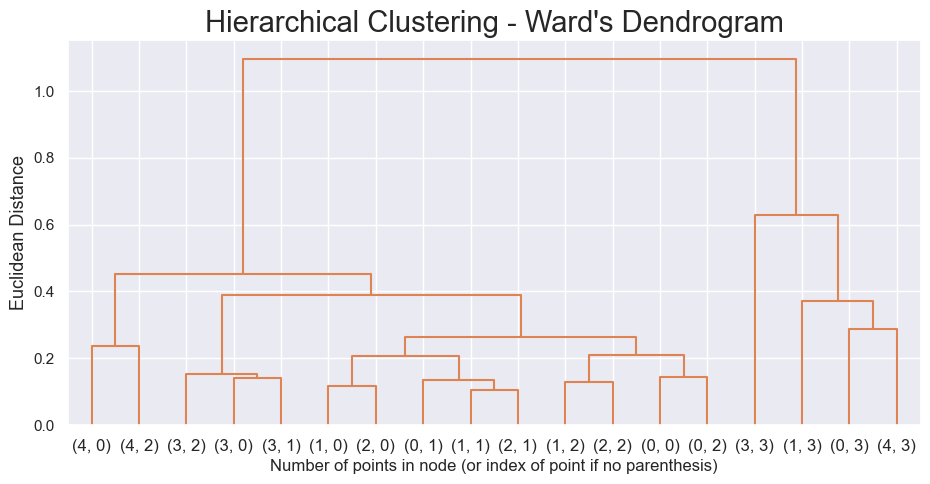

In [544]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)

hclust_labels = hclust.fit_predict(df_centroids)

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned

y_threshold = 1.5
# y_threshold = 3.3

dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)

In [545]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters= 2
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

DOW_0     DOW_1     DOW_2     DOW_3     DOW_4  \
HOURS_CLUSTER DOW_CLUSTER                                                     
0             0            0.054931  0.055160  0.056286  0.058009  0.084343   
              1            0.033542  0.027481  0.037323  0.030888  0.042712   
              2            0.105985  0.108552  0.117207  0.098724  0.106764   
              3            0.248864  0.212299  0.249091  0.218182  0.227273   
1             0            0.045641  0.043012  0.054010  0.053903  0.070254   
              1            0.032090  0.032116  0.038944  0.041434  0.064887   
              2            0.091560  0.089940  0.106379  0.101356  0.104111   
              3            0.191406  0.178676  0.217500  0.190441  0.227344   
2             0            0.029571  0.023879  0.030646  0.028678  0.037788   
              1            0.017034  0.016138  0.019409  0.018163  0.023762   
              2            0.071973  0.072222  0.087045  0.078946  0.071444   
3             0            0.054688  0.043693  0.052724  0.049774  0.057091   
              1            0.035212  0.033000  0.042105  0.035041  0.034988   
              2            0.091751  0.093023  0.102422  0.090287  0.085302   
              3            0.210145  0.219949  0.224155  0.213129  0.231884   
4             0            0.094595  0.082141  0.094895  0.101219  0.123874   
              2            0.146404  0.152834  0.181431  0.150416  0.149829   
              3            0.257483  0.251989  0.287805  0.260076  0.265937   

                              DOW_5     DOW_6      HR_0      HR_1      HR_2  \
HOURS_CLUSTER DOW_CLUSTER                                                     
0             0            0.114706  0.124740  0.019146  0.008403  0.006055   
              1            0.027992  0.030309  0.010039  0.004688  0.002252   
              2            0.052494  0.051870  0.026434  0.013003  0.009144   
              3            0.173182  0.214545  0.041212  0.022727  0.016667   
1             0            0.107425  0.126175  0.000815  0.001007  0.000392   
              1            0.032390  0.035431  0.000000  0.000000  0.000000   
              2            0.040633  0.044912  0.000898  0.000963  0.000618   
              3            0.127500  0.151250  0.000000  0.000000  0.000000   
2             0            0.091555  0.101200  0.003135  0.003565  0.003919   
              1            0.018082  0.019121  0.001753  0.001788  0.002558   
              2            0.020745  0.021041  0.003274  0.003508  0.003175   
3             0            0.108774  0.111538  0.018429  0.031422  0.048277   
              1            0.026914  0.024522  0.004785  0.017430  0.030901   
              2            0.036628  0.033648  0.019283  0.034572  0.050388   
              3            0.150725  0.171739  0.053140  0.093168  0.138889   
4             0            0.178829  0.211712  0.003003  0.000644  0.001502   
              2            0.060502  0.062785  0.000913  0.000652  0.000381   
              3            0.195344  0.211086  0.004878  0.005860  0.005913   

                           ...     HR_15     HR_16     HR_17     HR_18  \
HOURS_CLUSTER DOW_CLUSTER  ...                                           
0             0            ...  0.015496  0.017144  0.023702  0.029844   
              1            ...  0.002182  0.004037  0.006757  0.005148   
              2            ...  0.017131  0.015189  0.025187  0.029094   
              3            ...  0.042292  0.051240  0.065000  0.077273   
1             0            ...  0.042579  0.061688  0.081579  0.048050   
              1            ...  0.037329  0.066028  0.058062  0.020863   
              2            ...  0.046935  0.071398  0.082143  0.050034   
              3            ...  0.110870  0.207955  0.258125  0.148958   
2             0            ...  0.010014  0.009859  0.015595  0.020913   
              1            ...  0.006260  0.007998  0.

In [546]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()
cluster_mapper


{(0, 0): 1,
 (0, 1): 1,
 (0, 2): 1,
 (0, 3): 0,
 (1, 0): 1,
 (1, 1): 1,
 (1, 2): 1,
 (1, 3): 0,
 (2, 0): 1,
 (2, 1): 1,
 (2, 2): 1,
 (3, 0): 1,
 (3, 1): 1,
 (3, 2): 1,
 (3, 3): 0,
 (4, 0): 1,
 (4, 2): 1,
 (4, 3): 0}

In [547]:
df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['Merged_Cluster_1'] = df_.apply(
    lambda row: cluster_mapper[
        (row['HOURS_CLUSTER'], row['DOW_CLUSTER'])
    ], axis=1
)

df_ 

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,delta_day_order,tot_value_cui,order_freq,value_freq,product_freq,avg_order_value,avg_product_value,HOURS_CLUSTER,DOW_CLUSTER,Merged_Cluster_1
0,1b8f824d5e,2360,0.081081,0.025,0.014925,0.012048,0.0,0.011111,DELIVERY,DIGI,...,2.0,28.88,1.000000,14.440,2.500000,5.776,5.776,2,1,1
1,5d272b9dcb,8670,0.054054,0.025,0.003731,0.024096,0.0,0.011111,DISCOUNT,DIGI,...,2.0,19.21,1.000000,9.605,1.000000,9.605,9.605,2,1,1
2,f6d1b2ba63,4660,0.621622,0.000,0.003731,0.024096,0.0,0.011111,DISCOUNT,CASH,...,2.0,9.20,1.000000,4.600,1.000000,4.600,4.600,2,1,1
3,180c632ed8,4660,0.297297,0.025,0.007463,0.012048,0.0,0.022222,DELIVERY,DIGI,...,3.0,31.56,0.666667,10.520,1.000000,10.520,10.520,2,1,1
4,4eb37a6705,4660,0.135135,0.025,0.014925,0.000000,0.0,0.022222,No_Promo,DIGI,...,3.0,55.44,0.666667,18.480,1.666667,11.088,11.088,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31454,f4e366c281,8670,0.405405,0.000,0.000000,0.012048,0.0,0.000000,FREEBIE,DIGI,...,1.0,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1,1
31455,f6b6709018,8670,0.297297,0.000,0.000000,0.000000,0.0,0.000000,DELIVERY,DIGI,...,1.0,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1,1
31456,f74ad8ce3f,8670,0.243243,0.000,0.000000,0.012048,0.0,0.000000,No_Promo,DIGI,...,1.0,17.79,1.000000,17.790,1.000000,17.790,17.790,2,1,1
31457,f7b19c0241,8670,0.513514,0.000,0.000000,0.000000,0.0,0.000000,DISCOUNT,DIGI,...,1.0,12.03,1.000000,12.030,1.000000,12.030,12.030,2,1,1


In [548]:
# Merged cluster centroids
df_.groupby('Merged_Cluster_1').mean(numeric_only=True)[numerical_columns]

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
Merged_Cluster_1,,,,,,,,,,,,,,,,,,,,,
0,0.332585,0.289613,0.131674,0.223536,0.049124,0.947653,0.074393,0.040291,0.042473,0.033790,...,0.104659,0.073178,0.096031,0.125141,0.097124,0.051952,0.029773,0.042766,0.021972,0.020693
1,0.329634,0.047431,0.014876,0.029722,0.320580,0.702800,0.016191,0.010479,0.009326,0.001756,...,0.014610,0.010691,0.014391,0.017189,0.012194,0.006029,0.003400,0.005635,0.002808,0.003112


In [549]:
# Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('Merged_Cluster_1')\
    .size()\
    .to_frame()

df_counts

,0
Merged_Cluster_1,
0,710
1,30749


In [550]:
df["Merged_Cluster_1"] = df_["Merged_Cluster_1"]

In [551]:
df.groupby('Merged_Cluster_1')["customer_age"].agg(["mean", "min","max"])

,mean,min,max
Merged_Cluster_1,,,
0,0.332585,0.027027,0.972973
1,0.329634,0.000000,1.000000


In [552]:
df[df["Merged_Cluster_1"] == 0]["customer_city"].value_counts(normalize=True)

customer_city
2    0.504950
4    0.369165
8    0.125884
Name: proportion, dtype: float64

In [553]:
df[df["Merged_Cluster_1"] == 1]["customer_city"].value_counts(normalize=True)

customer_city
2    0.339920
4    0.331079
8    0.329001
Name: proportion, dtype: float64

In [554]:
df[df["Merged_Cluster_1"] == 0]["customer_region"].value_counts(normalize=True)

customer_region
2360    0.429986
4660    0.359264
8670    0.125884
2440    0.063649
2490    0.011315
4140    0.009901
Name: proportion, dtype: float64

In [555]:
df[df["Merged_Cluster_1"] == 1]["customer_region"].value_counts(normalize=True)

customer_region
8670    0.311912
4660    0.303269
2360    0.278560
2440    0.046977
4140    0.027810
8370    0.016231
2490    0.014383
8550    0.000858
Name: proportion, dtype: float64

In [556]:
# They spent a lot and dont used any promotions
df[df["Merged_Cluster_1"] == 0]["used_promo"].value_counts(normalize=True)

used_promo
False    0.680282
True     0.319718
Name: proportion, dtype: float64

In [557]:
df[df["Merged_Cluster_1"] == 1]["used_promo"].value_counts(normalize=True)

used_promo
False    0.521968
True     0.478032
Name: proportion, dtype: float64

In [558]:
df[df["Merged_Cluster_1"] == 0]["payment_method"].value_counts(normalize=True)

payment_method
CARD    0.721127
DIGI    0.169014
CASH    0.109859
Name: proportion, dtype: float64

In [559]:
df[df["Merged_Cluster_1"] == 1]["payment_method"].value_counts(normalize=True)

payment_method
CARD    0.631728
DIGI    0.191356
CASH    0.176916
Name: proportion, dtype: float64

The minority spend the most, but they dont use promotions. Paymenth method and age dont affect. City 2 has the most special customers, but its not a general behaviour of the city and the region.

## Second Iteration without Outliers

In [560]:
df_no_outliers = df[df["Merged_Cluster_1"] == 1]

In [561]:
df

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,delta_day_order,tot_value_cui,order_freq,value_freq,product_freq,avg_order_value,avg_product_value,HOURS_CLUSTER,DOW_CLUSTER,Merged_Cluster_1
0,1b8f824d5e,2360,0.081081,0.025,0.014925,0.012048,0.0,0.011111,DELIVERY,DIGI,...,2.0,28.88,1.000000,14.440,2.500000,5.776,5.776,2,1,1
1,5d272b9dcb,8670,0.054054,0.025,0.003731,0.024096,0.0,0.011111,DISCOUNT,DIGI,...,2.0,19.21,1.000000,9.605,1.000000,9.605,9.605,2,1,1
2,f6d1b2ba63,4660,0.621622,0.000,0.003731,0.024096,0.0,0.011111,DISCOUNT,CASH,...,2.0,9.20,1.000000,4.600,1.000000,4.600,4.600,2,1,1
3,180c632ed8,4660,0.297297,0.025,0.007463,0.012048,0.0,0.022222,DELIVERY,DIGI,...,3.0,31.56,0.666667,10.520,1.000000,10.520,10.520,2,1,1
4,4eb37a6705,4660,0.135135,0.025,0.014925,0.000000,0.0,0.022222,No_Promo,DIGI,...,3.0,55.44,0.666667,18.480,1.666667,11.088,11.088,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31454,f4e366c281,8670,0.405405,0.000,0.000000,0.012048,0.0,0.000000,FREEBIE,DIGI,...,1.0,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1,1
31455,f6b6709018,8670,0.297297,0.000,0.000000,0.000000,0.0,0.000000,DELIVERY,DIGI,...,1.0,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1,1
31456,f74ad8ce3f,8670,0.243243,0.000,0.000000,0.012048,0.0,0.000000,No_Promo,DIGI,...,1.0,17.79,1.000000,17.790,1.000000,17.790,17.790,2,1,1
31457,f7b19c0241,8670,0.513514,0.000,0.000000,0.000000,0.0,0.000000,DISCOUNT,DIGI,...,1.0,12.03,1.000000,12.030,1.000000,12.030,12.030,2,1,1


In [562]:
df_no_outliers

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,delta_day_order,tot_value_cui,order_freq,value_freq,product_freq,avg_order_value,avg_product_value,HOURS_CLUSTER,DOW_CLUSTER,Merged_Cluster_1
0,1b8f824d5e,2360,0.081081,0.025,0.014925,0.012048,0.0,0.011111,DELIVERY,DIGI,...,2.0,28.88,1.000000,14.440,2.500000,5.776,5.776,2,1,1
1,5d272b9dcb,8670,0.054054,0.025,0.003731,0.024096,0.0,0.011111,DISCOUNT,DIGI,...,2.0,19.21,1.000000,9.605,1.000000,9.605,9.605,2,1,1
2,f6d1b2ba63,4660,0.621622,0.000,0.003731,0.024096,0.0,0.011111,DISCOUNT,CASH,...,2.0,9.20,1.000000,4.600,1.000000,4.600,4.600,2,1,1
3,180c632ed8,4660,0.297297,0.025,0.007463,0.012048,0.0,0.022222,DELIVERY,DIGI,...,3.0,31.56,0.666667,10.520,1.000000,10.520,10.520,2,1,1
4,4eb37a6705,4660,0.135135,0.025,0.014925,0.000000,0.0,0.022222,No_Promo,DIGI,...,3.0,55.44,0.666667,18.480,1.666667,11.088,11.088,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31454,f4e366c281,8670,0.405405,0.000,0.000000,0.012048,0.0,0.000000,FREEBIE,DIGI,...,1.0,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1,1
31455,f6b6709018,8670,0.297297,0.000,0.000000,0.000000,0.0,0.000000,DELIVERY,DIGI,...,1.0,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1,1
31456,f74ad8ce3f,8670,0.243243,0.000,0.000000,0.012048,0.0,0.000000,No_Promo,DIGI,...,1.0,17.79,1.000000,17.790,1.000000,17.790,17.790,2,1,1
31457,f7b19c0241,8670,0.513514,0.000,0.000000,0.000000,0.0,0.000000,DISCOUNT,DIGI,...,1.0,12.03,1.000000,12.030,1.000000,12.030,12.030,2,1,1


In [563]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = "ward" 
distance = "euclidean" 


hclust = AgglomerativeClustering(linkage = linkage, metric=distance, distance_threshold=0, n_clusters=None) 
hclust.fit_predict(df_no_outliers[HR_col + DOW_col])

array([30748, 30747, 30746, ...,     5,     2,     0], dtype=int64)

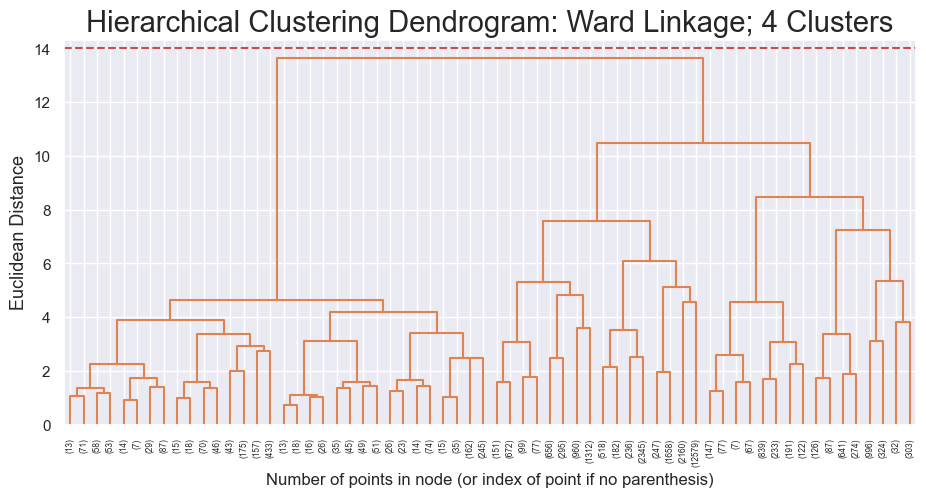

In [564]:
# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 14
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage; 4 Clusters', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [565]:
# Example of using DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=7)
dbscan_labels = dbscan.fit_predict(df_no_outliers[HR_col + DOW_col])
df_no_outliers['DBSCAN_Cluster'] = dbscan_labels

KeyboardInterrupt: 

In [83]:
df_no_outliers['DBSCAN_Cluster'].value_counts()

DBSCAN_Cluster
 0    25195
-1     1626
Name: count, dtype: int64

In [ ]:
hclust_4 = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=2)
hc_labels_4 = hclust_4.fit_predict(df_no_outliers[HR_col + DOW_col])
print(hc_labels_4)

labels_series = pd.Series(hc_labels_4, 
                          name='Hierarchical_Clustering_2_Clusters', 
                          index=df_no_outliers[HR_col + DOW_col].index 
                          ) 

df_no_outliers = pd.concat([df_no_outliers, labels_series], axis=1)

KeyboardInterrupt: 

In [85]:
pd.crosstab(df_no_outliers['DBSCAN_Cluster'], df_no_outliers['Hierarchical_Clustering_2_Clusters'])

Hierarchical_Clustering_2_Clusters,0,1
DBSCAN_Cluster,,
-1,830,796
0,23532,1663


In [230]:
#%pip install umap-learn
import umap

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_data = umap_model.fit_transform(df_no_outliers[HR_col + DOW_col])

#Create a DataFrame for the UMAP data
umap_df = pd.DataFrame(umap_data, columns=["UMAP1", "UMAP2"])
umap_df.index = df_no_outliers.index


c:\Users\andre\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\andre\AppData\Local\Temp\ipykernel_26892\4255707801.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


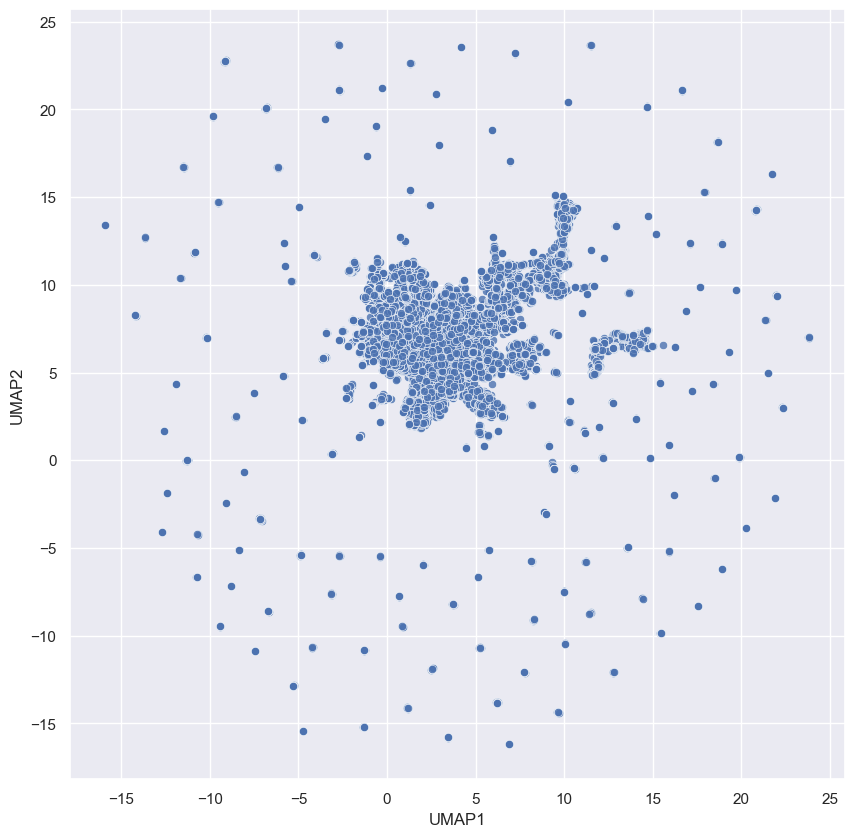

In [235]:
# Plot the UMAP data
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    data=umap_df[["UMAP1", "UMAP2"]],
    palette="tab10",
    alpha=0.8
)


plt.show()

In [236]:
scaler = StandardScaler()
umap_df[["UMAP1_Scaled", "UMAP2_Scaled"] ]= scaler.fit_transform(umap_df[["UMAP1", "UMAP2"]])

In [237]:
hclust_4 = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=4)
hc_labels_4 = hclust_4.fit_predict(umap_df[["UMAP1", "UMAP2"]])


labels_series = pd.Series(hc_labels_4, 
                          name='Hierarchical_Clustering_4_Clusters', 
                          index=umap_df[["UMAP1", "UMAP2"]].index 
                          ) 

umap_df["Hierarchical_Clustering_4_Clusters"] = labels_series

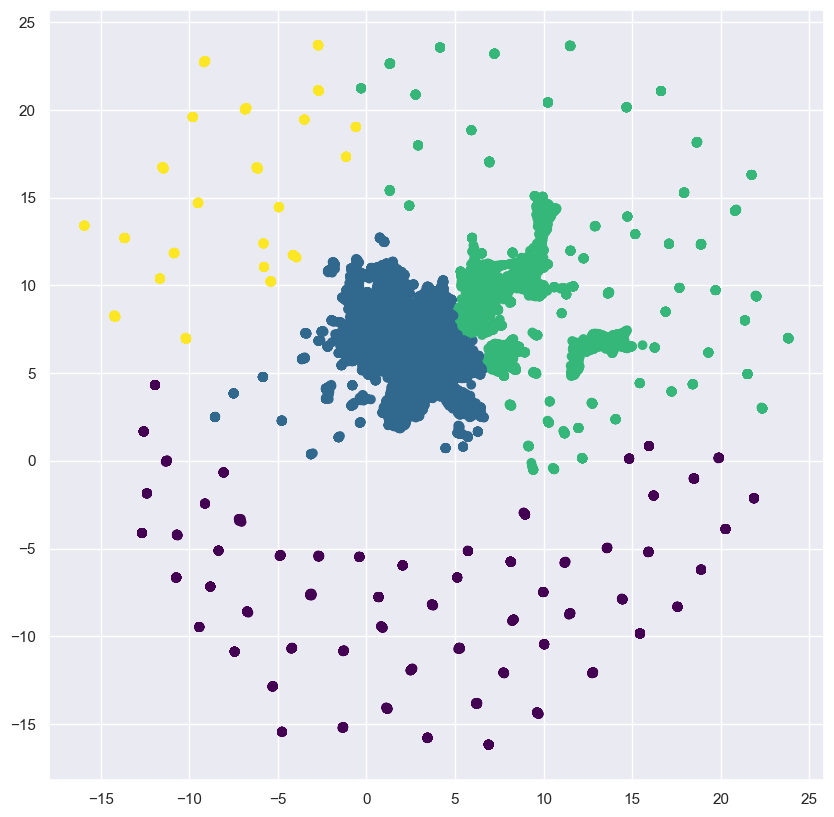

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(umap_df["UMAP1"], umap_df["UMAP2"], c=umap_df["Hierarchical_Clustering_4_Clusters"], cmap='viridis')
plt.show()

In [ ]:
umap_df["Hierarchical_Clustering_4_Clusters"] = umap_df["Hierarchical_Clustering_4_Clusters"] + 1

In [245]:
df_no_outliers["Merged_Cluster_1"] = umap_df["Hierarchical_Clustering_4_Clusters"]

C:\Users\andre\AppData\Local\Temp\ipykernel_26892\2666829072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["Merged_Cluster_1"] = umap_df["Hierarchical_Clustering_4_Clusters"]


In [ ]:
df_no_outliers

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,tot_value_cui,order_freq,value_freq,product_freq,avg_order_value,avg_product_value,HOURS_CLUSTER,DOW_CLUSTER,Merged_Cluster_1,Hierarchical_Clustering_4_Clusters
0,1b8f824d5e,2360,0.081081,0.025,0.014925,0.012048,0.0,0.011111,DELIVERY,DIGI,...,28.88,1.000000,14.440,2.500000,5.776,5.776,2,1,2,2
1,5d272b9dcb,8670,0.054054,0.025,0.003731,0.024096,0.0,0.011111,DISCOUNT,DIGI,...,19.21,1.000000,9.605,1.000000,9.605,9.605,2,1,2,2
2,f6d1b2ba63,4660,0.621622,0.000,0.003731,0.024096,0.0,0.011111,DISCOUNT,CASH,...,9.20,1.000000,4.600,1.000000,4.600,4.600,2,1,2,2
3,180c632ed8,4660,0.297297,0.025,0.007463,0.012048,0.0,0.022222,DELIVERY,DIGI,...,31.56,0.666667,10.520,1.000000,10.520,10.520,2,1,2,2
4,4eb37a6705,4660,0.135135,0.025,0.014925,0.000000,0.0,0.022222,No_Promo,DIGI,...,55.44,0.666667,18.480,1.666667,11.088,11.088,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31454,f4e366c281,8670,0.405405,0.000,0.000000,0.012048,0.0,0.000000,FREEBIE,DIGI,...,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1,1,1
31455,f6b6709018,8670,0.297297,0.000,0.000000,0.000000,0.0,0.000000,DELIVERY,DIGI,...,18.04,1.000000,18.040,1.000000,18.040,18.040,2,1,1,1
31456,f74ad8ce3f,8670,0.243243,0.000,0.000000,0.012048,0.0,0.000000,No_Promo,DIGI,...,17.79,1.000000,17.790,1.000000,17.790,17.790,2,1,4,4
31457,f7b19c0241,8670,0.513514,0.000,0.000000,0.000000,0.0,0.000000,DISCOUNT,DIGI,...,12.03,1.000000,12.030,1.000000,12.030,12.030,2,1,1,1


In [ ]:
df.loc[df_no_outliers.index, 'Merged_Cluster_1'] = df_no_outliers['Merged_Cluster_1']

In [253]:
df["Merged_Cluster_1"].value_counts()

Merged_Cluster_1
2    17394
3     8561
1     3540
4     1254
0      710
Name: count, dtype: int64

# 2. (HOURS AND DOW) + CUI MERGE

In [254]:
CUI_Clusters = pd.read_csv("cui_clusters_no_outliers.csv")

In [255]:
CUI_Clusters

,Unnamed: 0,K_Means_7_clusters
0,0,6
1,1,3
2,2,3
3,3,3
4,4,3
...,...,...
31454,31883,3
31455,31884,3
31456,31885,4
31457,31886,3


In [ ]:
df["CUI_CLUSTER"] = CUI_Clusters["K_Means_7_clusters"]

In [ ]:
# Get centroids of clusters
df_centroids_2 = df.groupby(['Merged_Cluster_1', 'CUI_CLUSTER'])\
    [DOW_col+HR_col+CUI_col].mean()


df_centroids_2

DOW_0     DOW_1     DOW_2     DOW_3  \
Merged_Cluster_1 CUI_CLUSTER                                           
0                0            0.235401  0.239802  0.280535  0.245599   
                 1            0.270661  0.247934  0.284848  0.249878   
                 2            0.236020  0.214396  0.223684  0.230650   
                 3            0.204897  0.194057  0.232990  0.197089   
                 4            0.242500  0.218824  0.248000  0.235294   
                 5            0.323113  0.290788  0.294340  0.278579   
                 6            0.235352  0.230699  0.270833  0.256434   
1                0            0.000000  0.000000  0.000000  0.000000   
                 1            0.000000  0.000000  0.000000  0.014706   
                 2            0.006048  0.004744  0.000000  0.006641   
                 3            0.007745  0.007116  0.000000  0.009238   
                 4            0.007576  0.003565  0.000000  0.005348   
                 5            0.008929  0.004202  0.000000  0.008403   
                 6            0.012019  0.011312  0.000000  0.002262   
2                0            0.078073  0.081458  0.100037  0.088462   
                 1            0.073086  0.071653  0.077030  0.076839   
                 2            0.055521  0.049551  0.063492  0.054960   
                 3            0.032221  0.031764  0.038213  0.034950   
                 4            0.041778  0.048443  0.052406  0.047185   
                 5            0.054370  0.064323  0.058266  0.050933   
                 6            0.053659  0.056385  0.066504  0.063558   
3                0            0.080966  0.070856  0.077273  0.068182   
                 1            0.046875  0.030882  0.063333  0.057353   
                 2            0.061328  0.056203  0.068933  0.058686   
                 3            0.021510  0.019005  0.026212  0.021906   
                 4            0.048401  0.045554  0.057015  0.046544   
                 5            0.043037  0.040377  0.048538  0.045150   
                 6            0.042230  0.030207  0.036036  0.033386   
4                1            0.000000  0.000000  0.000000  0.000000   
                 2            0.000000  0.000000  0.000000  0.003676   
                 3            0.004852  0.000000  0.000056  0.002681   
                 4            0.006944  0.000000  0.000000  0.009804   
                 5            0.003289  0.000000  0.000000  0.018576   
                 6            0.000000  0.000000  0.000000  0.000000   

                                 DOW_4     DOW_5     DOW_6      HR_0  \
Merged_Cluster_1 CUI_CLUSTER                                           
0                0            0.249088  0.183394  0.208394  0.003406   
                 1            0.284091  0.200000  0.221488  0.012121   
                 2            0.236020  0.159868  0.192105  0.059649   
                 3            0.210696  0.159794  0.163918  0.009622   
                 4            0.195000  0.166000  0.192000  0.026667   
                 5            0.306604  0.203774  0.211321  0.021384   
                 6            0.265625  0.167188  0.192969  0.011458   
1                0            0.000000  0.050000  0.000000  0.000000   
                 1            0.000000  0.012500  0.025000  0.000000   
                 2            0.010081  0.017742  0.009677  0.000000   
                 3            0.002939  0.013162  0.014700  0.000000   
                 4            0.001894  0.016667  0.018182  0.000000   
                 5            0.000000  0.017857  0.017857  0.000000   
                 6            0.000000  0.019231  0.009615  0.000000   
2                0            0.103983  0.071940  0.079383  0.001103   
                 1            0.083527  0.067865  0.080974  0.004950   
                 2            0.052135  0.040476  0.050246  0.005145   
                 3            0.043742  0.028896  0.034771  0.001178   


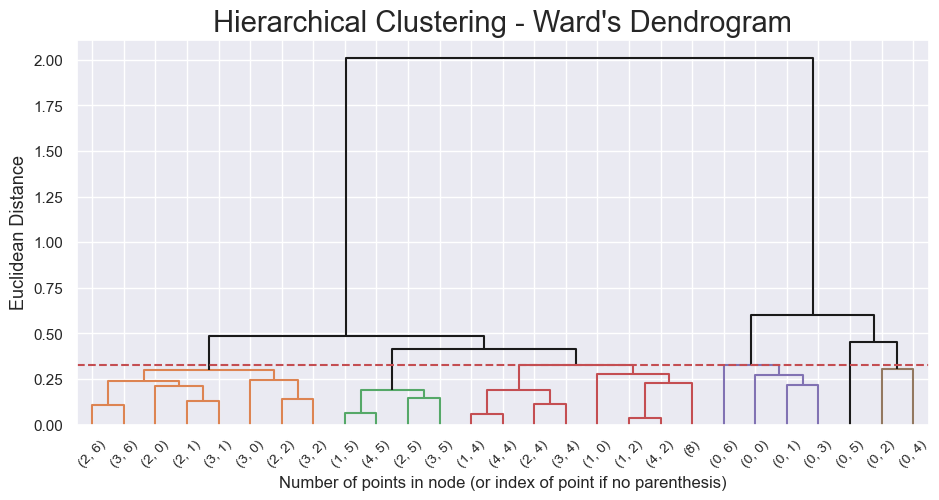

In [ ]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)

hclust_labels = hclust.fit_predict(df_centroids_2)

# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned

y_threshold = 0.33
# y_threshold = 3.3

dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids_2.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [316]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=4
)
hclust_labels = hclust.fit_predict(df_centroids_2)
df_centroids_2['hclust_labels'] = hclust_labels

df_centroids_2  # centroid's cluster labels

DOW_0     DOW_1     DOW_2     DOW_3  \
Merged_Cluster_1 CUI_CLUSTER                                           
0                0            0.235401  0.239802  0.280535  0.245599   
                 1            0.270661  0.247934  0.284848  0.249878   
                 2            0.236020  0.214396  0.223684  0.230650   
                 3            0.204897  0.194057  0.232990  0.197089   
                 4            0.242500  0.218824  0.248000  0.235294   
                 5            0.323113  0.290788  0.294340  0.278579   
                 6            0.235352  0.230699  0.270833  0.256434   
1                0            0.000000  0.000000  0.000000  0.000000   
                 1            0.000000  0.000000  0.000000  0.014706   
                 2            0.006048  0.004744  0.000000  0.006641   
                 3            0.007745  0.007116  0.000000  0.009238   
                 4            0.007576  0.003565  0.000000  0.005348   
                 5            0.008929  0.004202  0.000000  0.008403   
                 6            0.012019  0.011312  0.000000  0.002262   
2                0            0.078073  0.081458  0.100037  0.088462   
                 1            0.073086  0.071653  0.077030  0.076839   
                 2            0.055521  0.049551  0.063492  0.054960   
                 3            0.032221  0.031764  0.038213  0.034950   
                 4            0.041778  0.048443  0.052406  0.047185   
                 5            0.054370  0.064323  0.058266  0.050933   
                 6            0.053659  0.056385  0.066504  0.063558   
3                0            0.080966  0.070856  0.077273  0.068182   
                 1            0.046875  0.030882  0.063333  0.057353   
                 2            0.061328  0.056203  0.068933  0.058686   
                 3            0.021510  0.019005  0.026212  0.021906   
                 4            0.048401  0.045554  0.057015  0.046544   
                 5            0.043037  0.040377  0.048538  0.045150   
                 6            0.042230  0.030207  0.036036  0.033386   
4                1            0.000000  0.000000  0.000000  0.000000   
                 2            0.000000  0.000000  0.000000  0.003676   
                 3            0.004852  0.000000  0.000056  0.002681   
                 4            0.006944  0.000000  0.000000  0.009804   
                 5            0.003289  0.000000  0.000000  0.018576   
                 6            0.000000  0.000000  0.000000  0.000000   

                                 DOW_4     DOW_5     DOW_6      HR_0  \
Merged_Cluster_1 CUI_CLUSTER                                           
0                0            0.249088  0.183394  0.208394  0.003406   
                 1            0.284091  0.200000  0.221488  0.012121   
                 2            0.236020  0.159868  0.192105  0.059649   
                 3            0.210696  0.159794  0.163918  0.009622   
                 4            0.195000  0.166000  0.192000  0.026667   
                 5            0.306604  0.203774  0.211321  0.021384   
                 6            0.265625  0.167188  0.192969  0.011458   
1                0            0.000000  0.050000  0.000000  0.000000   
                 1            0.000000  0.012500  0.025000  0.000000   
                 2            0.010081  0.017742  0.009677  0.000000   
                 3            0.002939  0.013162  0.014700  0.000000   
                 4            0.001894  0.016667  0.018182  0.000000   
                 5            0.000000  0.017857  0.017857  0.000000   
                 6            0.000000  0.019231  0.009615  0.000000   
2                0            0.103983  0.071940  0.079383  0.001103   
                 1            0.083527  0.067865  0.080974  0.004950   
                 2            0.052135  0.040476  0.050246  0.005145   
                 3            0.043742  0.028896  0.034771  0.001178   


In [317]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids_2['hclust_labels'].to_dict()
cluster_mapper

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 1,
 (0, 3): 0,
 (0, 4): 1,
 (0, 5): 2,
 (0, 6): 2,
 (1, 0): 3,
 (1, 1): 3,
 (1, 2): 3,
 (1, 3): 3,
 (1, 4): 2,
 (1, 5): 0,
 (1, 6): 3,
 (2, 0): 1,
 (2, 1): 1,
 (2, 2): 1,
 (2, 3): 3,
 (2, 4): 2,
 (2, 5): 0,
 (2, 6): 1,
 (3, 0): 1,
 (3, 1): 1,
 (3, 2): 1,
 (3, 3): 3,
 (3, 4): 2,
 (3, 5): 0,
 (3, 6): 1,
 (4, 1): 3,
 (4, 2): 3,
 (4, 3): 3,
 (4, 4): 2,
 (4, 5): 0,
 (4, 6): 3}

In [318]:
df_2 = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_2['Merged_Clusters_2'] = df_2.apply(
    lambda row: cluster_mapper[
        (row['Merged_Cluster_1'], row['CUI_CLUSTER'])
    ], axis=1
)

df_2

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,value_freq,product_freq,avg_order_value,avg_product_value,HOURS_CLUSTER,DOW_CLUSTER,Merged_Cluster_1,CUI_CLUSTER,Merged_Cluster_2,Merged_Clusters_2
0,1b8f824d5e,2360,0.081081,0.025,0.014925,0.012048,0.0,0.011111,DELIVERY,DIGI,...,14.440,2.500000,5.776,5.776,2,1,2,6,0,1
1,5d272b9dcb,8670,0.054054,0.025,0.003731,0.024096,0.0,0.011111,DISCOUNT,DIGI,...,9.605,1.000000,9.605,9.605,2,1,2,3,3,3
2,f6d1b2ba63,4660,0.621622,0.000,0.003731,0.024096,0.0,0.011111,DISCOUNT,CASH,...,4.600,1.000000,4.600,4.600,2,1,2,3,3,3
3,180c632ed8,4660,0.297297,0.025,0.007463,0.012048,0.0,0.022222,DELIVERY,DIGI,...,10.520,1.000000,10.520,10.520,2,1,2,3,3,3
4,4eb37a6705,4660,0.135135,0.025,0.014925,0.000000,0.0,0.022222,No_Promo,DIGI,...,18.480,1.666667,11.088,11.088,2,1,2,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31454,f4e366c281,8670,0.405405,0.000,0.000000,0.012048,0.0,0.000000,FREEBIE,DIGI,...,18.040,1.000000,18.040,18.040,2,1,1,3,3,3
31455,f6b6709018,8670,0.297297,0.000,0.000000,0.000000,0.0,0.000000,DELIVERY,DIGI,...,18.040,1.000000,18.040,18.040,2,1,1,3,3,3
31456,f74ad8ce3f,8670,0.243243,0.000,0.000000,0.012048,0.0,0.000000,No_Promo,DIGI,...,17.790,1.000000,17.790,17.790,2,1,4,4,2,2
31457,f7b19c0241,8670,0.513514,0.000,0.000000,0.000000,0.0,0.000000,DISCOUNT,DIGI,...,12.030,1.000000,12.030,12.030,2,1,1,3,3,3


In [319]:
# Merge cluster contigency table
# Getting size of each final cluster
df_counts_2 = df_2.groupby('Merged_Clusters_2')\
    .size()\
    .to_frame()

df_counts_2

,0
Merged_Clusters_2,
0,1241
1,3432
2,652
3,26134


In [320]:
df["Merged_Cluster_2"] = df_2["Merged_Clusters_2"]

In [321]:
new_features_list.remove("customer_city")

ValueError: list.remove(x): x not in list

In [322]:
new_features_list

['used_promo',
 'order_count',
 'avg_product_by_order',
 'delta_day_order',
 'tot_value_cui',
 'order_freq',
 'value_freq',
 'product_freq',
 'avg_order_value',
 'avg_product_value']

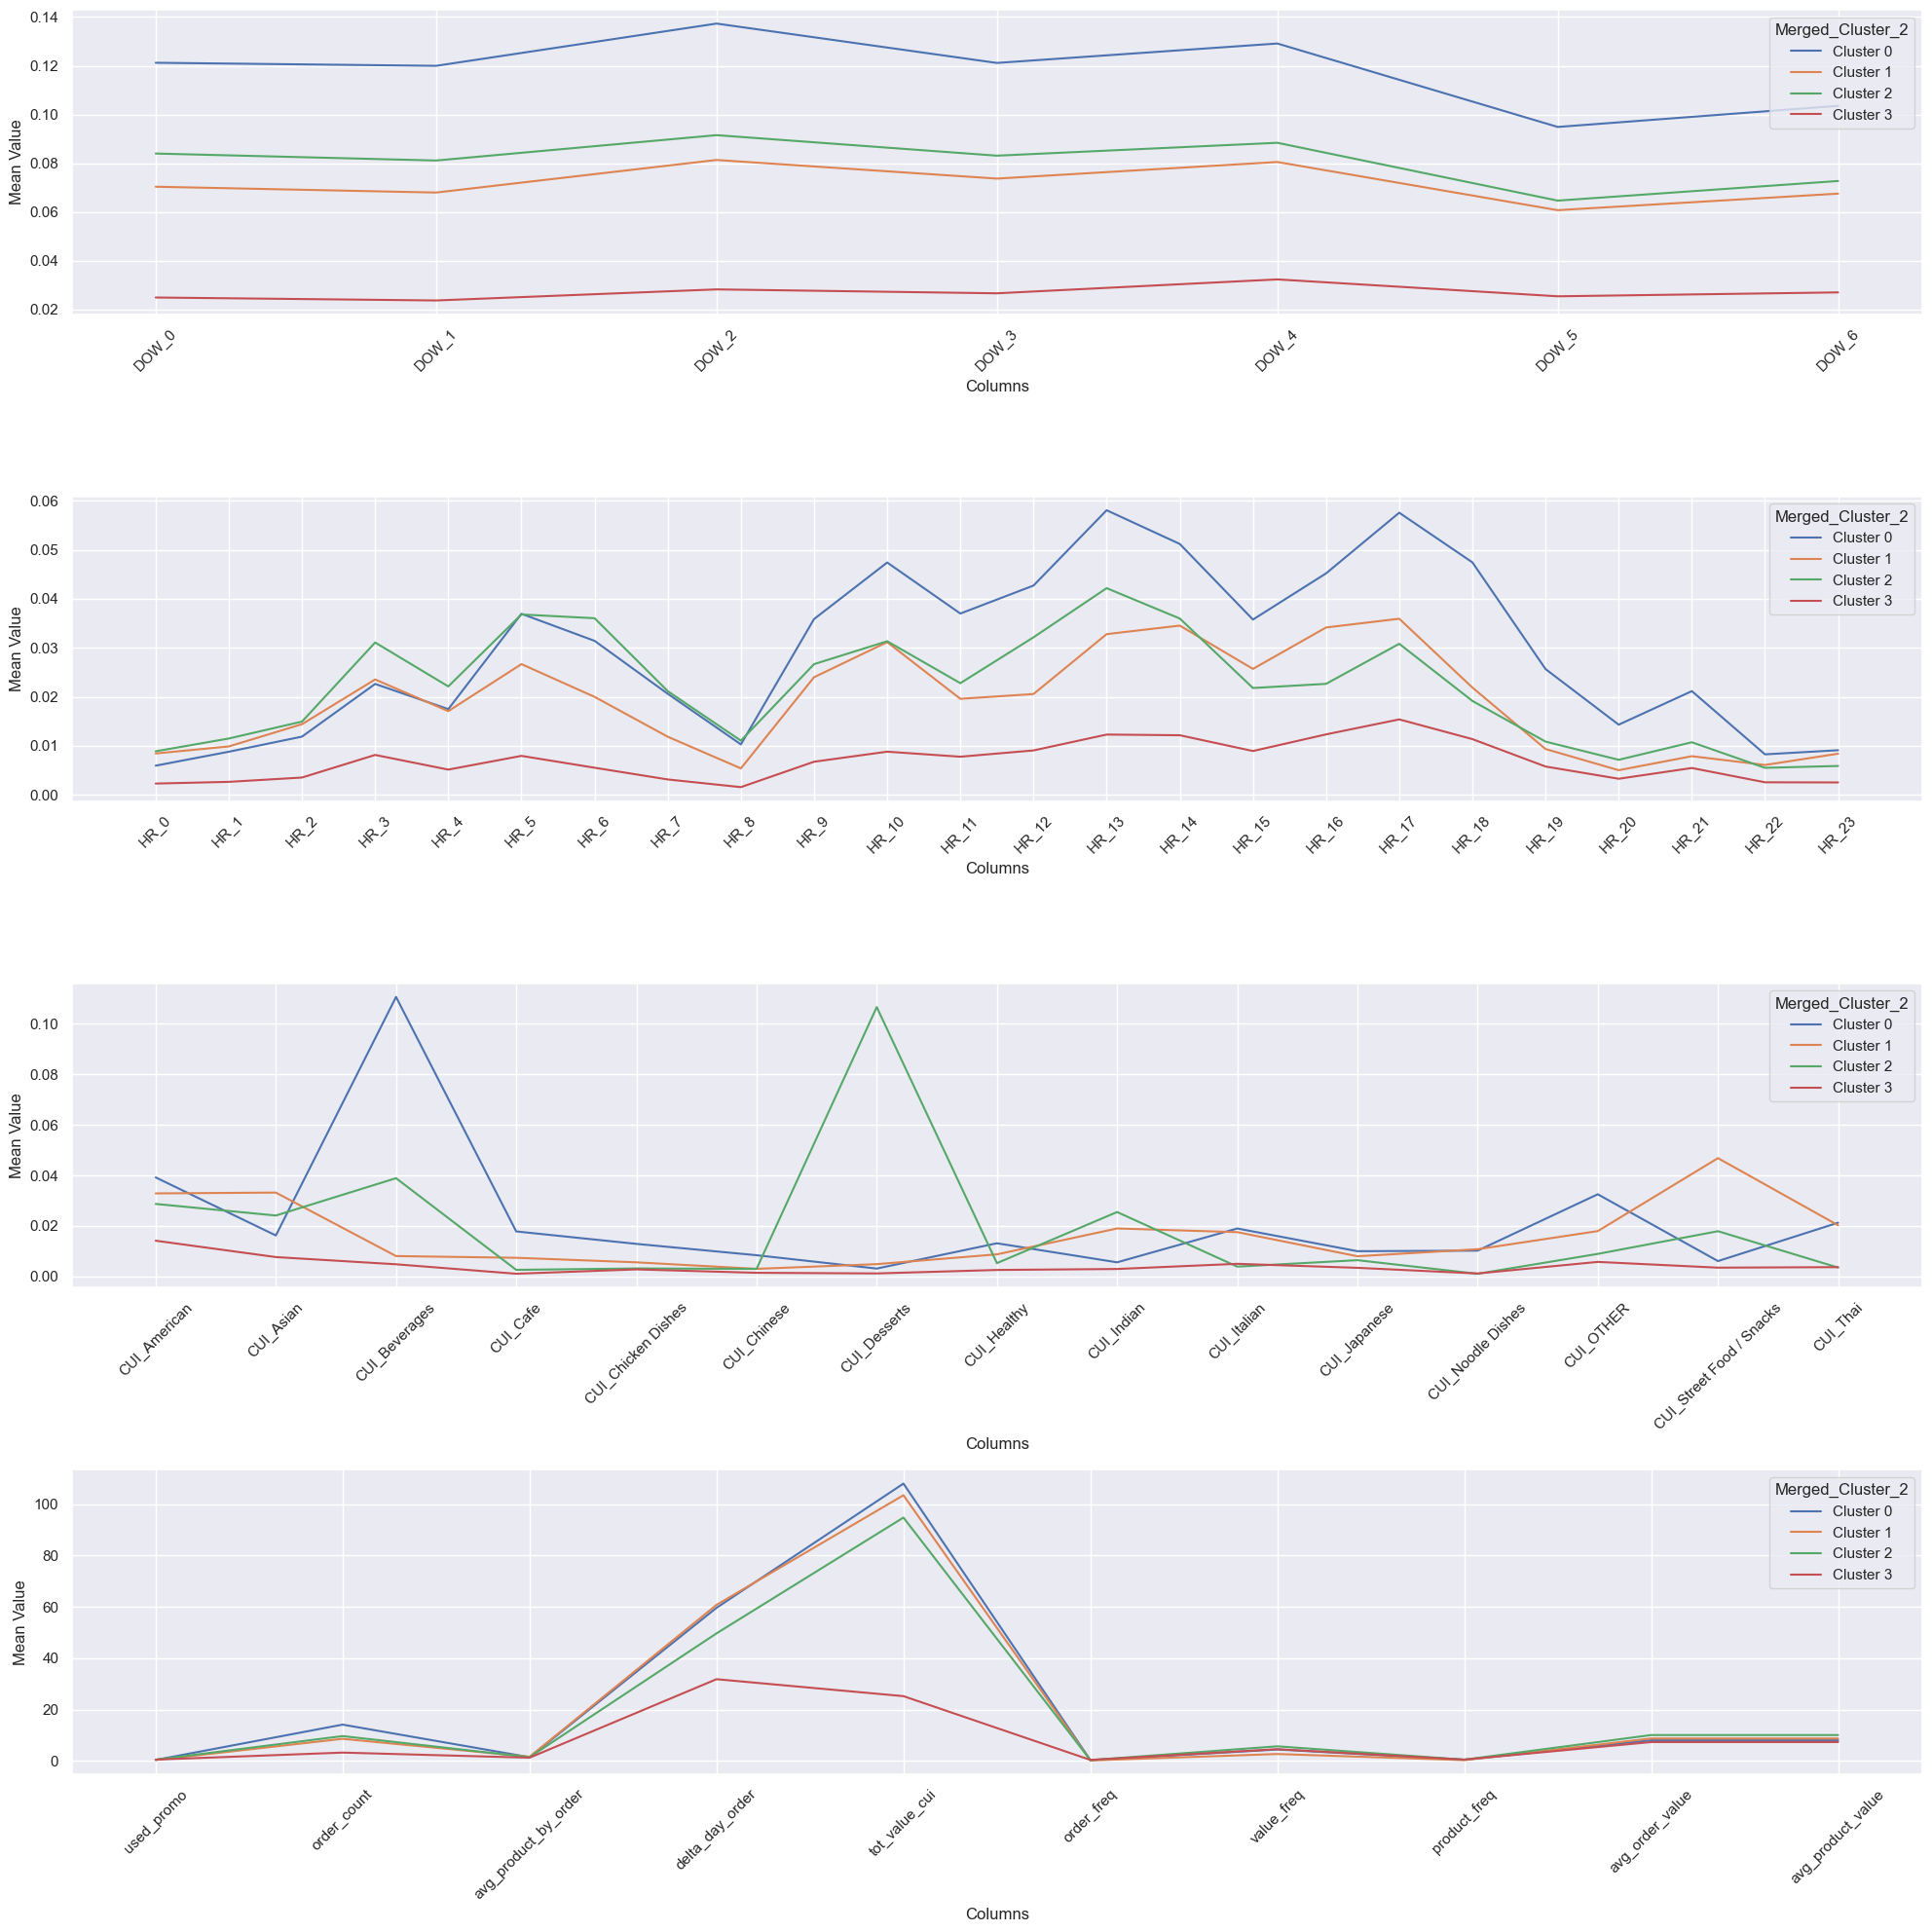

In [323]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and DOW_col, HR_col, CUI_col, Numerical_Features are column names

# List of column names for the subplots
columns_to_plot = [DOW_col, HR_col, CUI_col, new_features_list]

# Create a figure with 4 vertically stacked subplots (4 rows, 1 column)
fig, axs = plt.subplots(4, 1, figsize=(20, 20))

# Iterate over each column set (DOW_col, HR_col, etc.) and plot in the respective subplot
for i, col_set in enumerate(columns_to_plot):
    # Group by the clusters and calculate the mean
    df_grouped = df.groupby("Merged_Cluster_2")[col_set].mean()
    
    # Plot each cluster's data in the corresponding subplot
    for cluster in df_grouped.index:
        axs[i].plot(df_grouped.columns, df_grouped.loc[cluster], label=f"Cluster {cluster}")
    
    # Set labels and title for each subplot
    axs[i].set_xlabel('Columns')
    axs[i].set_ylabel('Mean Value')
    # Rotate x-axis labels for better readability
    axs[i].tick_params(axis='x', rotation=45)
    
    
    # Display the legend for each subplot
    axs[i].legend(title="Merged_Cluster_2")
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [380]:
df_no_outliers_2 = df[df["Merged_Cluster_2"] == 3]

In [ ]:
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_data_2 = umap_model.fit_transform(df_no_outliers_2[HR_col + DOW_col + CUI_col])

#Create a DataFrame for the UMAP data
umap_df_2 = pd.DataFrame(umap_data_2, columns=["UMAP1", "UMAP2"])
umap_df_2.index = df_no_outliers_2.index

c:\Users\andre\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [384]:
umap_df_2

,UMAP1,UMAP2
1,-1.324274,4.522580
2,-1.360828,4.513212
3,-2.234815,12.928716
4,1.094963,5.163834
5,8.536642,9.752380
...,...,...
31453,1.230630,2.979186
31454,3.103619,11.400435
31455,1.933952,2.399398
31457,3.481807,1.023433


C:\Users\andre\AppData\Local\Temp\ipykernel_26892\806971265.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


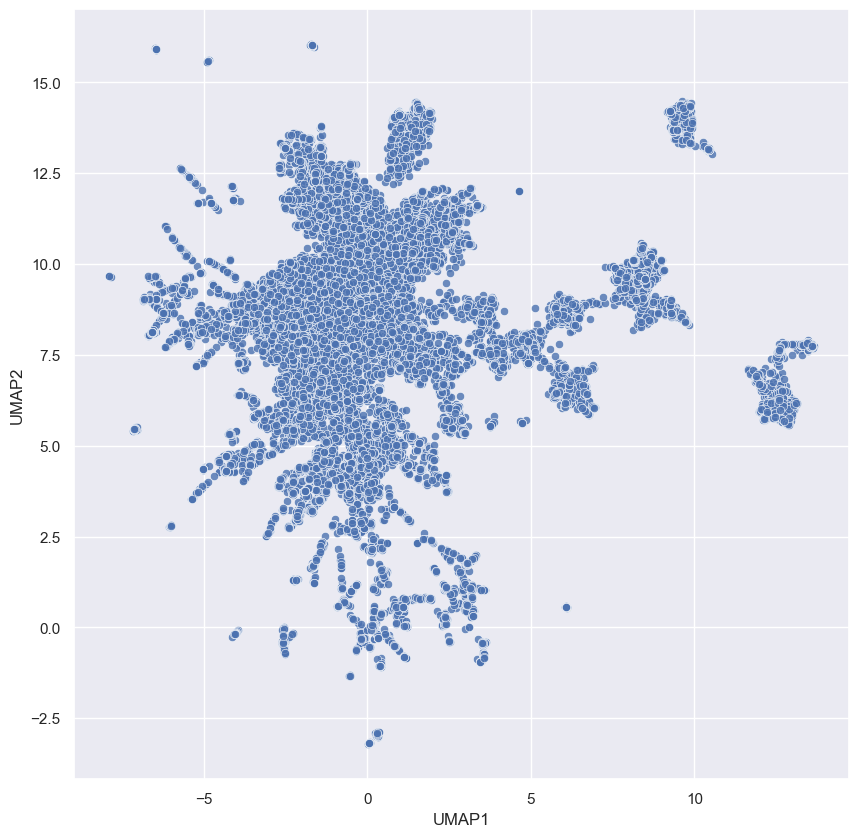

In [ ]:
# Plot the UMAP data
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x="UMAP1",
    y="UMAP2",
    data=umap_df_2[["UMAP1", "UMAP2"]],
    palette="tab10",
    alpha=0.8
)


plt.show()

In [386]:
hclust_4 = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=4)
hc_labels_4 = hclust_4.fit_predict(umap_df_2[["UMAP1", "UMAP2"]])


labels_series = pd.Series(hc_labels_4, 
                          name='Hierarchical_Clustering_4_Clusters', 
                          index=umap_df_2[["UMAP1", "UMAP2"]].index 
                          ) 

umap_df_2["Hierarchical_Clustering_4_Clusters"] = labels_series

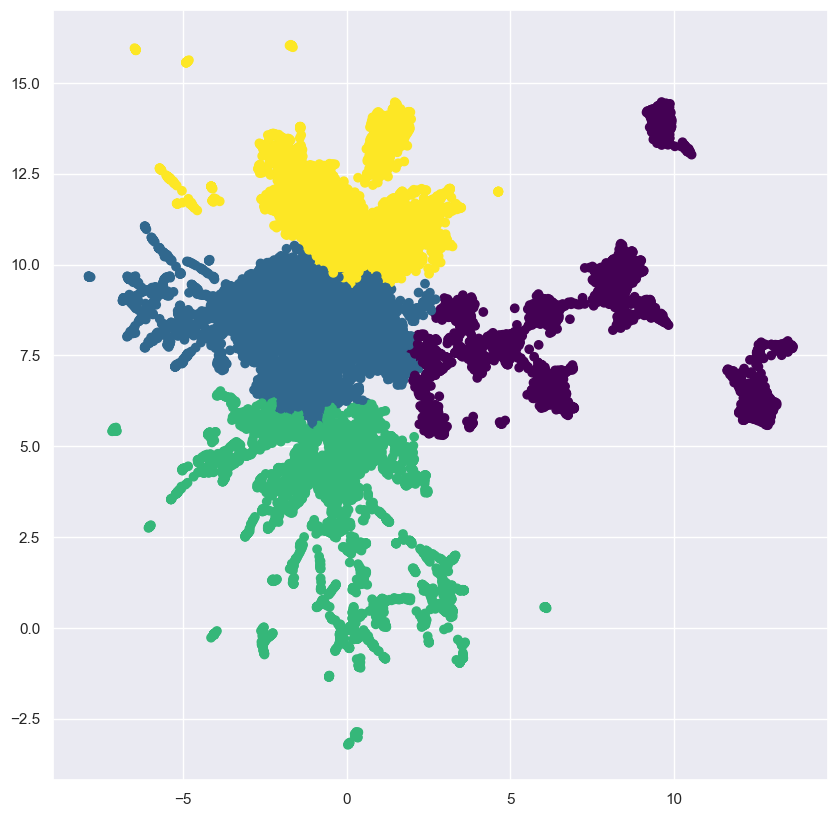

In [387]:
plt.figure(figsize=(10, 10))
plt.scatter(umap_df_2["UMAP1"], umap_df_2["UMAP2"], c=umap_df_2["Hierarchical_Clustering_4_Clusters"], cmap='viridis')
plt.show()

In [392]:
umap_df_2["Hierarchical_Clustering_4_Clusters"].value_counts()

Hierarchical_Clustering_4_Clusters
1    8385
3    6626
0    5746
2    5377
Name: count, dtype: int64

In [393]:
df_no_outliers_2["Merged_Cluster_2"] = umap_df_2["Hierarchical_Clustering_4_Clusters"] + 3

C:\Users\andre\AppData\Local\Temp\ipykernel_26892\906550934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers_2["Merged_Cluster_2"] = umap_df_2["Hierarchical_Clustering_4_Clusters"] + 3


In [395]:
df_no_outliers_2["Merged_Cluster_2"].value_counts()

Merged_Cluster_2
4    8385
6    6626
3    5746
5    5377
Name: count, dtype: int64

In [396]:
df.loc[df_no_outliers_2.index, 'Merged_Cluster_2'] = df_no_outliers_2["Merged_Cluster_2"]

In [398]:
df["Merged_Cluster_2"].value_counts()

Merged_Cluster_2
4    8385
6    6626
3    5746
5    5377
1    3432
0    1241
2     652
Name: count, dtype: int64

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(df[numerical_columns], df["Merged_Cluster_2"])
print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: -0.029381779621511936


In [452]:
new_features_list = [item for item in new_features_list if not isinstance(item, pd.Index)]
list(new_features_list)

['used_promo',
 'order_count',
 'avg_product_by_order',
 'delta_day_order',
 'tot_value_cui',
 'order_freq',
 'value_freq',
 'product_freq',
 'avg_order_value',
 'avg_product_value']

In [ ]:
from scipy.stats import entropy
def calculate_entropy(values):
    _, counts = np.unique(values, return_counts=True)
    return entropy(counts, base=2)

# Calculate entropy for each cluster and numerical column
entropy_columns = list(numerical_columns) + list(new_features_list)
results = {}
for cluster_label, group in df.groupby('Merged_Cluster_2'):
    cluster_results = {}
    for col in entropy_columns:
        cluster_results[col] = calculate_entropy(group[col])
    results[cluster_label] = cluster_results

# Convert to DataFrame for readability
entropy_df = pd.DataFrame(results).T  # Transpose for better readability
entropy_df.index.name = 'Cluster Label'
entropy_df

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,used_promo,order_count,avg_product_by_order,delta_day_order,tot_value_cui,order_freq,value_freq,product_freq,avg_order_value,avg_product_value
Cluster Label,,,,,,,,,,,,,,,,,,,,,
0,4.500874,4.158941,5.372894,4.687011,5.297172,5.055533,4.979633,5.502681,7.819392,1.478314,...,0.955979,4.932607,6.274251,5.872577,10.206772,8.395639,10.267618,8.695330,10.242835,10.242835
1,4.549207,3.577405,4.627813,3.757734,5.449065,5.125342,5.305189,6.484856,2.027763,1.221687,...,0.927339,4.202371,5.928691,6.172733,11.598035,8.780471,11.732376,9.160439,11.692452,11.692452
2,4.517743,3.754754,4.940034,3.965562,5.726814,5.351519,3.913866,5.443151,3.145847,0.557679,...,0.996087,4.463080,5.312647,5.902649,9.304626,7.520770,9.342593,7.871178,9.321121,9.321121
3,4.557259,2.309141,2.937214,2.371537,6.292655,6.166140,4.082882,7.328068,2.410169,0.252587,...,0.998590,2.589560,2.557543,5.590713,11.434967,6.443684,12.213070,6.938024,11.609572,11.609572
4,4.563137,2.439970,3.233367,2.862028,6.053082,5.845265,4.488188,4.051526,1.470522,0.576597,...,0.992766,2.907323,2.841518,6.181714,12.045578,7.393558,12.911581,7.762289,12.351069,12.351069
5,4.561657,1.349279,2.075758,1.862143,5.895814,5.879448,2.811845,2.739794,0.891422,0.299074,...,0.982365,1.590200,1.794916,3.267859,11.205966,3.598324,11.672505,4.338699,11.318365,11.318365
6,4.536697,2.893543,3.672870,3.307072,6.050060,5.955533,4.801306,3.810643,2.634746,0.592652,...,0.996988,3.367309,3.330744,6.060418,11.900505,7.504996,12.569083,7.942385,12.157436,12.157436


In [454]:
# Calculate the weighted average entropy based on the number of rows in each cluster
avg_entropy = (entropy_df.mul(df['Merged_Cluster_2'].value_counts(), axis=0).sum() / df['Merged_Cluster_2'].value_counts().sum()).to_frame(name='Weighted Average Entropy')
avg_entropy['Average Entropy'] = entropy_df.mean(axis=0).values
avg_entropy["Difference"] = (avg_entropy["Weighted Average Entropy"] - avg_entropy["Average Entropy"]) / avg_entropy["Average Entropy"]

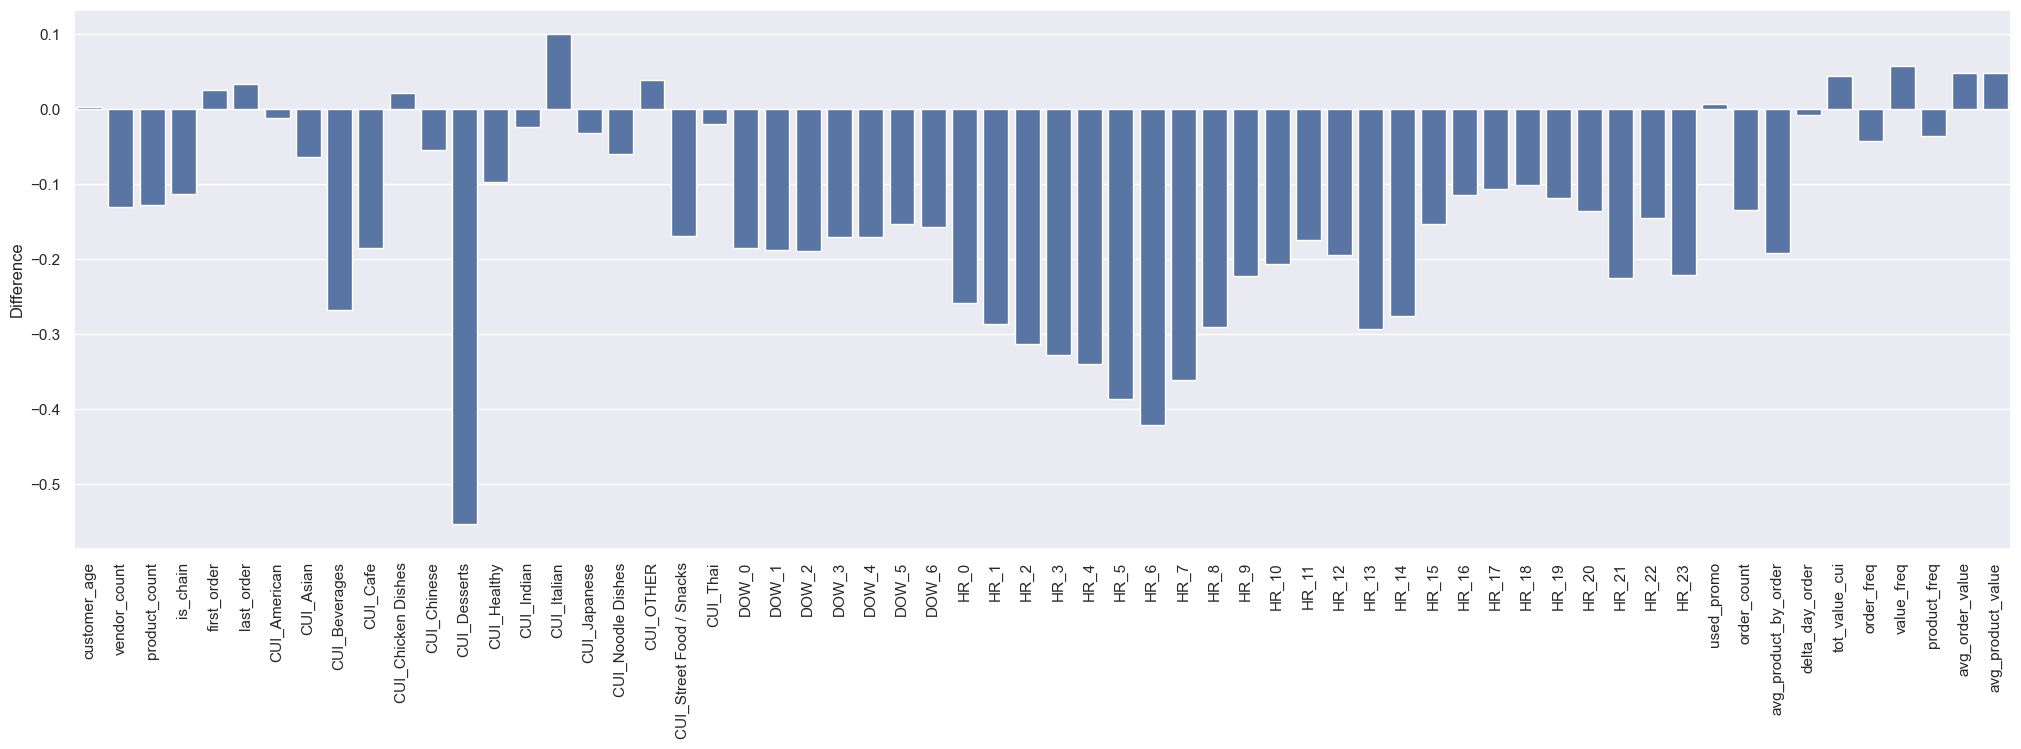

In [ ]:
plt.figure(figsize=(25, 7))
sns.barplot(avg_entropy["Difference"])
plt.xticks(rotation=90)
plt.show()

In [459]:
df["Merged_Cluster_2"].value_counts()

Merged_Cluster_2
4    8385
6    6626
3    5746
5    5377
1    3432
0    1241
2     652
Name: count, dtype: int64

In [486]:
import plotly.graph_objects as go
import plotly.subplots as sp
import pandas as pd

# Variables
columns_list = [DOW_col, HR_col, CUI_col, new_features_list]
titles_list = ["DOW", "HR", "CUI", "New Features"]
cluster_labels = df["Merged_Cluster_2"].unique()

# Create subplots with larger dimensions and spacing
fig = sp.make_subplots(
    rows=len(cluster_labels),
    cols=len(columns_list),
    specs=[[{'type': 'polar'}]*len(columns_list)]*len(cluster_labels),
    subplot_titles=[f"{title} - Cluster {label}" for label in cluster_labels for title in titles_list],
    vertical_spacing=0.1,
    horizontal_spacing=0.1,
)

# Generate radar plots
for row, cluster_label in enumerate(cluster_labels, start=1):
    df_cluster = df[df["Merged_Cluster_2"] == cluster_label]
    for col, (columns, title) in enumerate(zip(columns_list, titles_list), start=1):
        # Calculate the mean for numeric columns
        mean_values = df_cluster[columns].mean()

        # Create radar trace
        radar_trace = go.Scatterpolar(
            r=mean_values.values,
            theta=mean_values.index,
            fill='toself',
            name=f"Cluster {cluster_label} - {title}",
            marker=dict(size=10),
        )

        # Add radar plot to subplots
        fig.add_trace(radar_trace, row=row, col=col)

# Update layout
fig.update_layout(
    height=500*len(cluster_labels),  # Increase height for readability
    width=2000,  # Increase width for readability
    title="Radar Charts for Each Cluster and Variable",
    title_font_size=20,
    font=dict(size=14),
    showlegend=False,
)

# Display figure
fig.show()


## Number of Clients per Cluster

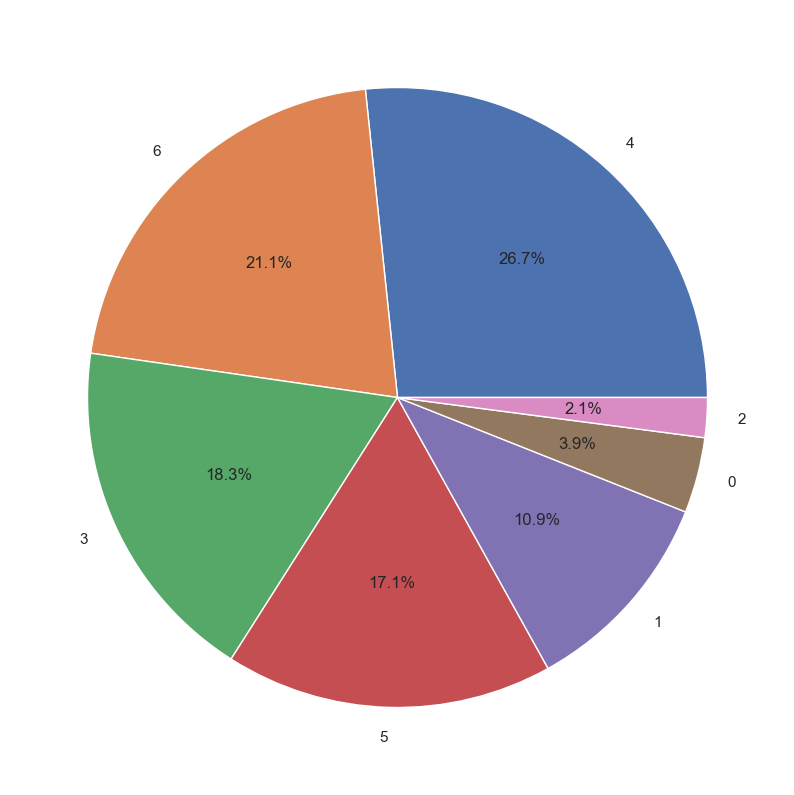

In [ ]:
plt.figure(figsize=(10, 15))
plt.pie(df["Merged_Cluster_2"].value_counts(), labels=df["Merged_Cluster_2"].value_counts().index, autopct='%1.1f%%')
plt.show()

In [519]:
df['Merged_Cluster_2'].value_counts()

Merged_Cluster_2
4    8385
6    6626
3    5746
5    5377
1    3432
0    1241
2     652
Name: count, dtype: int64

## Cluster by Age

In [491]:
df.groupby("Merged_Cluster_2")["customer_age"].agg(["mean","max","min","median"])

,mean,max,min,median
Merged_Cluster_2,,,,
0,0.330030,0.972973,0.027027,0.297297
1,0.333199,1.000000,0.000000,0.297297
2,0.330874,1.000000,0.027027,0.297297
3,0.331432,1.000000,0.000000,0.297297
4,0.329459,1.000000,0.000000,0.297297
5,0.328562,1.000000,0.000000,0.297297
6,0.327441,1.000000,0.000000,0.297297


## Total Spending by Cluster

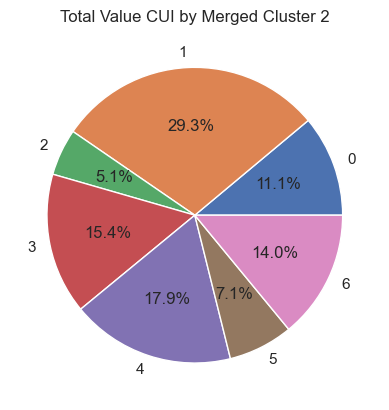

In [ ]:

tot_value_cui_sum = df.groupby('Merged_Cluster_2')["tot_value_cui"].sum()
	
# Plot the pie chart
plt.pie(tot_value_cui_sum.values, labels=tot_value_cui_sum.index, autopct='%1.1f%%')
plt.title('Total Value CUI by Merged Cluster 2')
plt.show()


In [505]:
df.groupby("Merged_Cluster_2")[new_features_list].agg(["mean","median"])

used_promo        order_count        avg_product_by_order  \
                       mean median        mean median                 mean   
Merged_Cluster_2                                                             
0                  0.377115    0.0   14.132957    9.0             1.440011   
1                  0.342657    0.0    8.606061    7.0             1.601245   
2                  0.463190    0.0    9.668712    5.0             1.435594   
3                  0.522102    1.0    2.829969    2.0             1.260166   
4                  0.449970    0.0    3.598211    3.0             1.222717   
5                  0.578017    1.0    1.652594    1.0             1.303731   
6                  0.467703    0.0    4.429218    3.0             1.232697   

                           delta_day_order        tot_value_cui          \
                    median            mean median          mean  median   
Merged_Cluster_2                                                          
0                 1.333333       59.624496   72.0    108.019533  80.880   
1                 1.500000       60.773893   67.0    103.483823  88.965   
2                 1.357143       49.670245   56.0     94.786288  70.525   
3                 1.000000       29.707971   25.0     32.510686  25.450   
4                 1.000000       38.053309   38.0     25.856177  20.760   
5                 1.000000       13.504928    1.0     15.948317  12.780   
6                 1.125000       40.640658   42.0     25.636075  20.310   

                 order_freq           value_freq           product_freq  \
                       mean    median       mean    median         mean   
Merged_Cluster_2                                                          
0                  0.300277  0.232558   4.445118  1.678161     0.467903   
1                  0.170494  0.134328   2.689839  1.549737     0.287678   
2                  0.320863  0.181818   5.684701  2.009278     0.484055   
3                  0.378111  0.125000   5.674655  1.399961     0.494977   
4                  0.260500  0.104478   2.584201  0.722174     0.331684   
5                  0.697194  1.000000   8.566195  5.540000     0.934771   
6                  0.284428  0.119403   2.855877  0.661972     0.371291   

                           avg_order_value            avg_product_value  \
                    median            mean     median              mean   
Merged_Cluster_2                                                          
0                 0.292683        8.031614   8.068000          8.031614   
1                 0.197368        8.749148   8.808571          8.749148   
2                 0.250000       10.066947  10.221250         10.066947   
3                 0.151515        9.905179   9.665500          9.905179   
4                 0.125000        6.442587   6.025000          6.442587   
5                 1.000000        8.084683   6.950000          8.084683   
6                 0.142857        5.642235   4.493667          5.642235   

                             
                     median  
Merged_Cluster_2             
0                  8.068000  
1                  8.808571  
2                 10.221250  
3                  9.665500  
4                  6.025000  
5                  6.950000  
6                  4.493667

In [503]:
new_features_list

['used_promo',
 'order_count',
 'avg_product_by_order',
 'delta_day_order',
 'tot_value_cui',
 'order_freq',
 'value_freq',
 'product_freq',
 'avg_order_value',
 'avg_product_value']

## Cluster by City

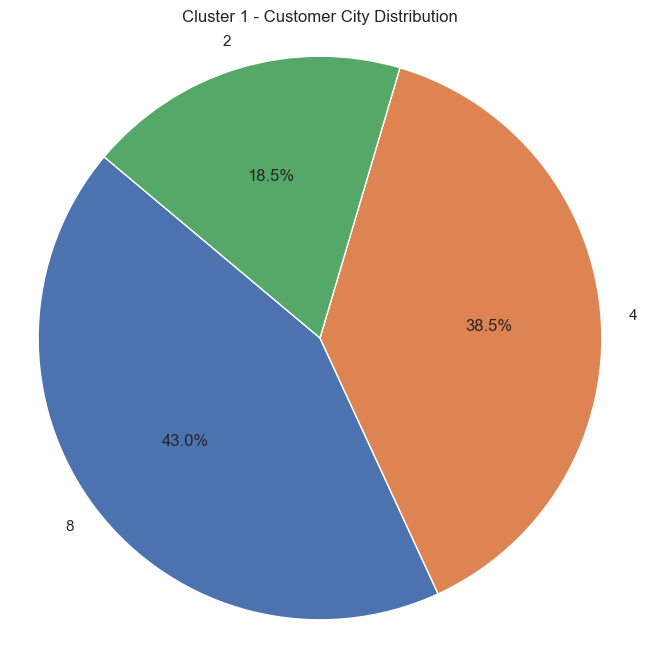

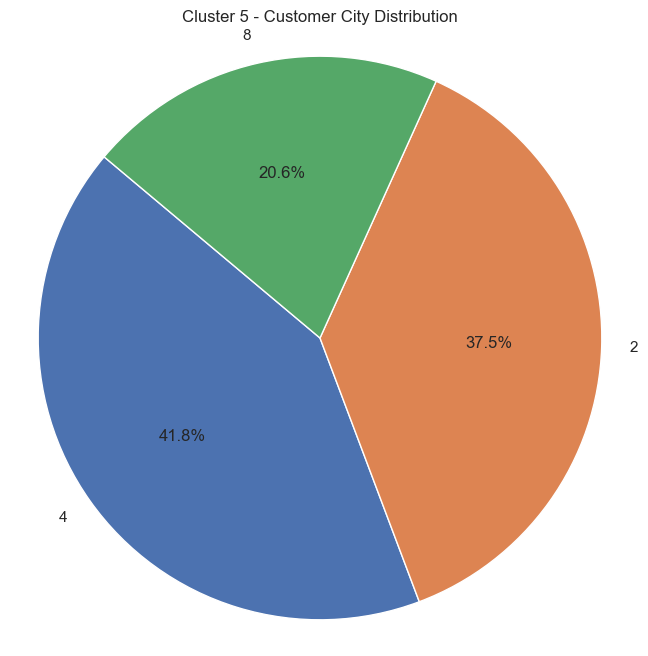

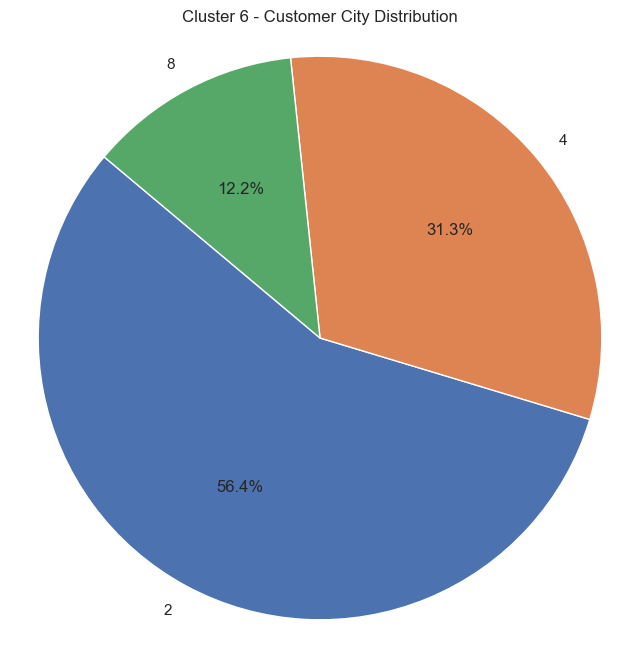

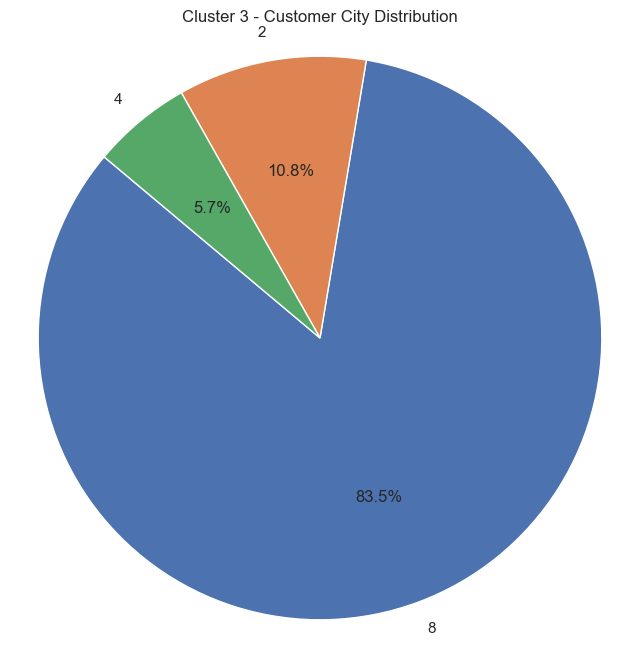

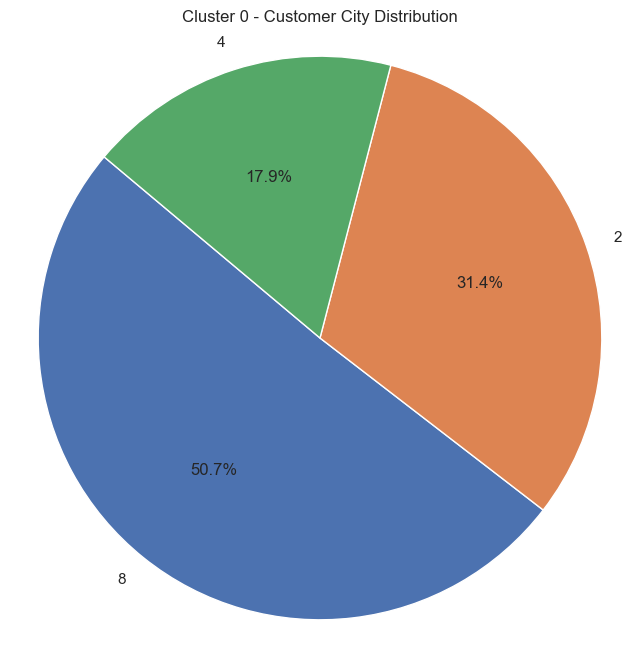

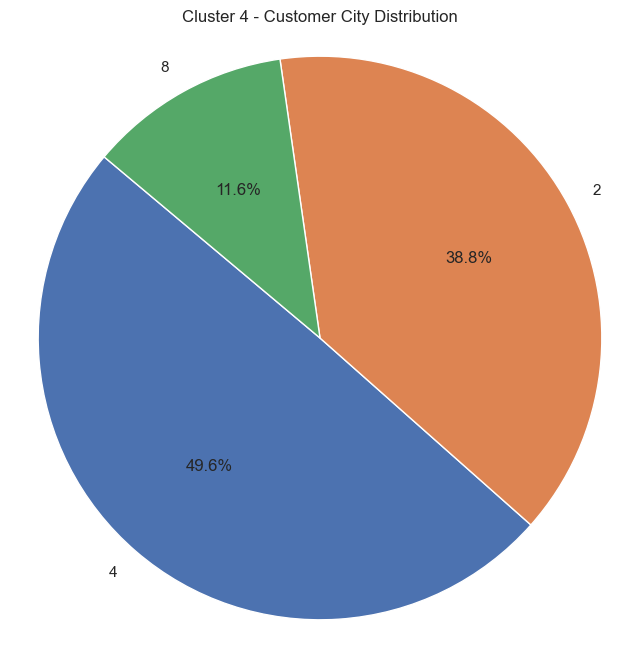

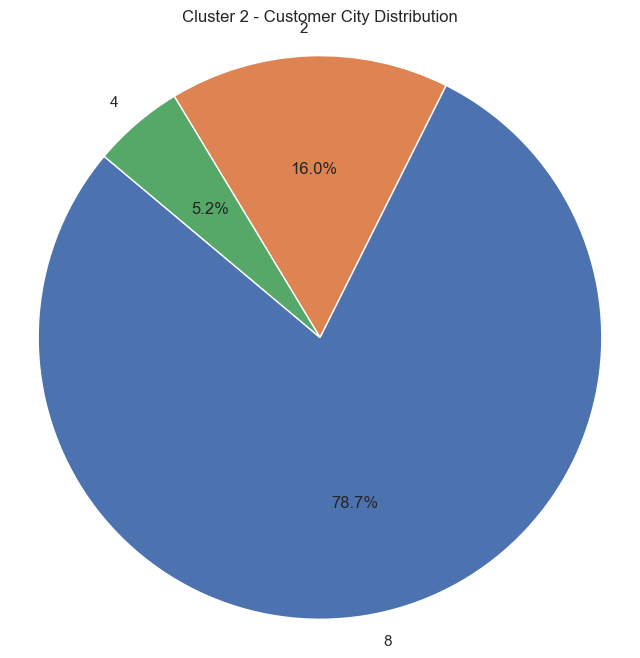

In [ ]:
df.groupby("Merged_Cluster_2")["customer_city"].value_counts(normalize=True)
for cluster_label in df["Merged_Cluster_2"].unique():
    cluster_data = df[df["Merged_Cluster_2"] == cluster_label]["customer_city"].value_counts(normalize=True)
    plt.figure(figsize=(8, 8))
    plt.pie(cluster_data, labels=cluster_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Cluster {cluster_label} - Customer City Distribution')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()